In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\20228\Downloads\merged_brfss_oxcgrt.csv"
output_file_path = r"C:\Users\20228\Downloads\merged_brfss_oxcgrt_with_stringency.csv"

df = pd.read_csv(file_path, encoding='latin1')



C:\Users\20228\AppData\Local\Temp\ipykernel_9456\3181079028.py:7: DtypeWarning: Columns (19,28,37,46,55,64,73,78,81,83,85,87,90,92,94,96,98,107,110,119,121,123,125,126,127,133,135) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin1')


In [2]:

# Define variables related to stringency index
variables_C = [
    'C1M_School closing', 'C2E_Workplace.closing', 'C2M_Workplace closing',
    'C3E_Cancel public events', 'C3M_Cancel public events',
    'C4E_Restrictions on gatherings', 'C4M_Restrictions on gatherings',
    'C5E_Close public transport', 'C5M_Close public transport',
    'C6E_Stay at home requirements', 'C6M_Stay at home requirements',
    'C7E_Restrictions on internal movement', 'C7M_Restrictions on internal movement',
    'C8E_International travel controls', 'C8EV_International travel controls'
]
variables_H = [
    'H1E_Public information campaigns', 'H2E_Testing policy', 'H3E_Contact tracing',
    'H4E_Emergency investment in healthcare', 'H5E_Investment in vaccines',
    'H6E_Facial Coverings', 'H6M_Facial Coverings', 'H7E_Vaccination policy',
    'H8E_Protection of elderly people', 'H8M_Protection of elderly people'
]
variables_E = [
    'E1E_Income support', 'E2E_Debt/contract relief', 
    'E3E_Fiscal measures', 'E4E_International support'
]

# Combine all stringency-related columns
stringency_cols = variables_C + variables_H + variables_E
stringency_cols = [col.replace(' ', '.').replace('/', '.') for col in stringency_cols]

# Ensure only existing columns are used for calculation
existing_cols = [col for col in stringency_cols if col in df.columns]

# Calculate stringency index
df['stringency_index'] = df[existing_cols].sum(axis=1, skipna=True)

# Categorize states by policy stringency
df['policy_category'] = pd.cut(
    df['stringency_index'],
    bins=[-float('inf'), 30, 60, float('inf')],
    labels=['Low Restriction', 'Moderate Restriction', 'High Restriction']
)

In [4]:
print (df['stringency_index'])

0         36.0
1         36.0
2         36.0
3         36.0
4         36.0
          ... 
380624    48.0
380625    48.0
380626    48.0
380627    48.0
380628    48.0
Name: stringency_index, Length: 380629, dtype: float64


In [5]:

# Save the modified dataset to a new file
df.to_csv(output_file_path, index=False)

print(f"File saved with stringency index and policy categories at: {output_file_path}")


File saved with stringency index and policy categories at: C:\Users\20228\Downloads\merged_brfss_oxcgrt_with_stringency.csv


In [6]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
file_path = r"C:\Users\20228\Downloads\merged_brfss_oxcgrt_with_stringency.csv"
df = pd.read_csv(file_path)

# Ensure necessary columns exist
if 'policy_category' not in df.columns or 'X_MENT14D' not in df.columns:
    raise ValueError("The required columns 'policy_category' or 'X_MENT14D' are missing.")

# Drop rows with NaN values in relevant columns
df = df.dropna(subset=['policy_category', 'X_MENT14D'])

# Group data by stringency levels
low_restriction = df[df['policy_category'] == 'Low Restriction']['X_MENT14D']
moderate_restriction = df[df['policy_category'] == 'Moderate Restriction']['X_MENT14D']
high_restriction = df[df['policy_category'] == 'High Restriction']['X_MENT14D']

# Perform t-tests
results = {
    "Low vs Moderate": ttest_ind(low_restriction, moderate_restriction, equal_var=False),
    "Low vs High": ttest_ind(low_restriction, high_restriction, equal_var=False),
    "Moderate vs High": ttest_ind(moderate_restriction, high_restriction, equal_var=False)
}

# Format results for display
formatted_results = {
    comparison: {
        "t-statistic": res.statistic,
        "p-value": res.pvalue
    }
    for comparison, res in results.items()
}

# Output the results
for comparison, stats in formatted_results.items():
    print(f"{comparison}:")
    print(f"  t-statistic: {stats['t-statistic']:.4f}")
    print(f"  p-value: {stats['p-value']:.4f}")
    print()


C:\Users\20228\AppData\Local\Temp\ipykernel_27480\3044312854.py:6: DtypeWarning: Columns (19,28,37,46,55,64,73,78,81,83,85,87,90,92,94,96,98,107,110,119,121,123,125,126,127,133,135) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Low vs Moderate:
  t-statistic: -11.7372
  p-value: 0.0000

Low vs High:
  t-statistic: -1.3865
  p-value: 0.1657

Moderate vs High:
  t-statistic: 0.8550
  p-value: 0.3926



C:\Users\20228\AppData\Local\Temp\ipykernel_27480\1437151027.py:8: DtypeWarning: Columns (19,28,37,46,55,64,73,78,81,83,85,87,90,92,94,96,98,107,110,119,121,123,125,126,127,133,135) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


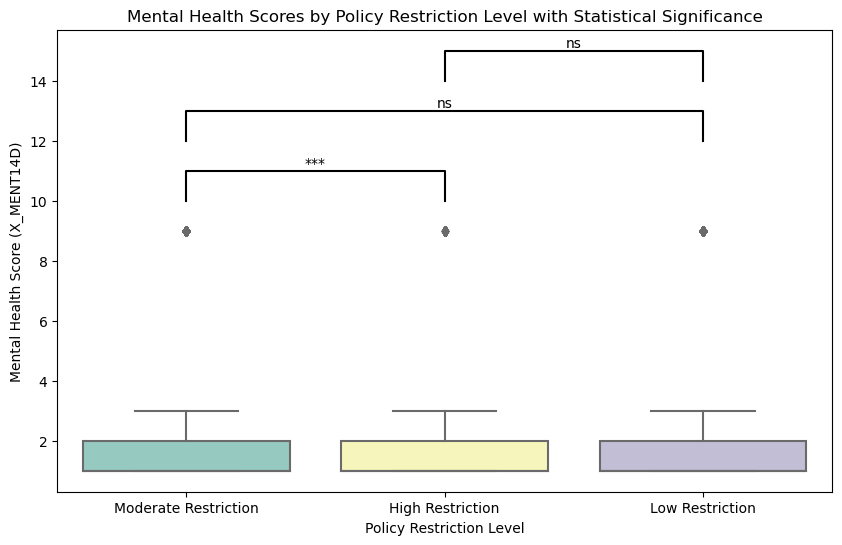

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
file_path = r"C:\Users\20228\Downloads\merged_brfss_oxcgrt_with_stringency.csv"
df = pd.read_csv(file_path)

# Ensure necessary columns exist
if 'policy_category' not in df.columns or 'X_MENT14D' not in df.columns:
    raise ValueError("The required columns 'policy_category' or 'X_MENT14D' are missing.")

# Drop rows with NaN values in relevant columns
df = df.dropna(subset=['policy_category', 'X_MENT14D'])

# Group data by stringency levels
low_restriction = df[df['policy_category'] == 'Low Restriction']['X_MENT14D']
moderate_restriction = df[df['policy_category'] == 'Moderate Restriction']['X_MENT14D']
high_restriction = df[df['policy_category'] == 'High Restriction']['X_MENT14D']

# Perform t-tests
t1, p1 = ttest_ind(low_restriction, moderate_restriction, equal_var=False)
t2, p2 = ttest_ind(low_restriction, high_restriction, equal_var=False)
t3, p3 = ttest_ind(moderate_restriction, high_restriction, equal_var=False)

# Annotate significance based on p-value
def get_significance_label(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'  # Not significant

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='policy_category', y='X_MENT14D', data=df, palette="Set3")

# Add statistical annotations manually
x1, x2 = 0, 1
y, h = df['X_MENT14D'].max() + 1, 1  # Height of annotations
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c='black')
plt.text((x1 + x2) * 0.5, y + h, get_significance_label(p1), ha='center', va='bottom')

x1, x2 = 0, 2
y = y + 2
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c='black')
plt.text((x1 + x2) * 0.5, y + h, get_significance_label(p2), ha='center', va='bottom')

x1, x2 = 1, 2
y = y + 2
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c='black')
plt.text((x1 + x2) * 0.5, y + h, get_significance_label(p3), ha='center', va='bottom')

# Customize the plot
plt.title("Mental Health Scores by Policy Restriction Level with Statistical Significance")
plt.xlabel("Policy Restriction Level")
plt.ylabel("Mental Health Score (X_MENT14D)")

# Save the plot
output_plot_path = r"C:\Users\20228\Downloads\mental_health_significance_plot_manual.png"
plt.savefig(output_plot_path, dpi=300, bbox_inches='tight')

plt.show()
